1. Скачайте датасет House Prices Kaggle со страницы конкурса (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) и сохраните его в том же каталоге, что и ваш скрипт или блокнот Python.

In [1]:
# Импортируем библиотеки для скачивания с сайта Kaggle
from pathlib import Path
import opendatasets as od

In [3]:
# Скачиваем дата сет с сайта Kaggle
dataset_path = Path('house-prices')
if not dataset_path.is_file():
    od.download('https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Downloading house-prices-advanced-regression-techniques.zip to .\house-prices-advanced-regression-techniques


100%|██████████| 199k/199k [00:00<00:00, 304kB/s]


Extracting archive .\house-prices-advanced-regression-techniques/house-prices-advanced-regression-techniques.zip to .\house-prices-advanced-regression-techniques


2. Загрузите датасет в pandas DataFrame под названием df.

In [2]:
# Импортируем библиотеки для работы с датасетом
import pandas as pd
import numpy as np

In [17]:
# Добавляем файл датасет в DataFrame pandas
df = pd.read_csv('C:\\Users\\Esdesu\\Desktop\\JreJre\\Сбор и разметка данных\\HomeWork\\Work#8\\house-prices-advanced-regression-techniques\\train.csv')

3. Выполните предварительную обработку данных, выполнив следующие шаги: 
- a. Определите и обработайте отсутствующие значения в датасете. Определите, в каких столбцах есть отсутствующие значения, и решите, как их обработать (например, заполнить средним, медианой или модой, или отбросить столбцы/строки с существенными отсутствующими значениями). 
- b. Проверьте и обработайте любые дублирующиеся строки в датасете. 
- c. Проанализируйте типы данных в каждом столбце и при необходимости преобразуйте их (например, из объектных в числовые типы).

In [20]:
# Получаем первичную информацию о датасете
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [21]:
# Получаем представление о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [22]:
# Ещё один метод проверки данных
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Столбы с отсуствующими значениями:
    LotFrontage: Linear feet of street connected to property
    Alley: Type of alley access
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinType2: Quality of second finished area 
    Electrical: Electrical system
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageQual: Garage quality
    GarageCond: Garage condition
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories

In [18]:
# Обработка для столбца LotFrontage: Linear feet of street connected to property(Фасад участка: Длина улицы в линейных футах, соединенной с участком):
df['LotFrontage'].info() # Определяем тип данных, количество значений
df['LotFrontage'].unique() # Поиск уникальных значений

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: LotFrontage
Non-Null Count  Dtype  
--------------  -----  
1201 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [21]:
# Заполняем пустые значения средними значениями
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
# Проверяем
df['LotFrontage'].unique()

array([ 65.        ,  80.        ,  68.        ,  60.        ,
        84.        ,  85.        ,  75.        ,  70.04995837,
        51.        ,  50.        ,  70.        ,  91.        ,
        72.        ,  66.        , 101.        ,  57.        ,
        44.        , 110.        ,  98.        ,  47.        ,
       108.        , 112.        ,  74.        , 115.        ,
        61.        ,  48.        ,  33.        ,  52.        ,
       100.        ,  24.        ,  89.        ,  63.        ,
        76.        ,  81.        ,  95.        ,  69.        ,
        21.        ,  32.        ,  78.        , 121.        ,
       122.        ,  40.        , 105.        ,  73.        ,
        77.        ,  64.        ,  94.        ,  34.        ,
        90.        ,  55.        ,  88.        ,  82.        ,
        71.        , 120.        , 107.        ,  92.        ,
       134.        ,  62.        ,  86.        , 141.        ,
        97.        ,  54.        ,  41.        ,  79.  

In [22]:
# По начальному состоянию видим, что здесь не используются значения float в следствии чего переводит в int
# Сначала округлим значения на всякий случай
df['LotFrontage'] = df['LotFrontage'].round()
# Затем преобразуем округленные значения в int
df['LotFrontage'] = df['LotFrontage'].astype(int)
# Проверяем
df['LotFrontage'].unique()

array([ 65,  80,  68,  60,  84,  85,  75,  70,  51,  50,  91,  72,  66,
       101,  57,  44, 110,  98,  47, 108, 112,  74, 115,  61,  48,  33,
        52, 100,  24,  89,  63,  76,  81,  95,  69,  21,  32,  78, 121,
       122,  40, 105,  73,  77,  64,  94,  34,  90,  55,  88,  82,  71,
       120, 107,  92, 134,  62,  86, 141,  97,  54,  41,  79, 174,  99,
        67,  83,  43, 103,  93,  30, 129, 140,  35,  37, 118,  87, 116,
       150, 111,  49,  96,  59,  36,  56, 102,  58,  38, 109, 130,  53,
       137,  45, 106, 104,  42,  39, 144, 114, 128, 149, 313, 168, 182,
       138, 160, 152, 124, 153,  46])

In [49]:
# Обработка для столбца Alley: Type of alley access(Аллея: Тип подъездной аллеи):
df['Alley'].info() # Определяем тип данных, количество значений
df['Alley'].unique() # Поиск уникальных значений

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: Alley
Non-Null Count  Dtype 
--------------  ----- 
91 non-null     object
dtypes: object(1)
memory usage: 11.5+ KB


array([nan, 'Grvl', 'Pave'], dtype=object)

In [50]:
# Заполняем пустые значения на моду
df['Alley'] = df['Alley'].fillna(df['Alley'].mode().iloc[0])
# Проверяем
df['Alley'].unique()

array(['Grvl', 'Pave'], dtype=object)

In [24]:
# Обработка для столбца MasVnrType: Masonry veneer type(Тип кладки: Тип облицовочного кирпича):
df['MasVnrType'].info() # Определяем тип данных, количество значений
df['MasVnrType'].unique() # Поиск уникальных значений

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: MasVnrType
Non-Null Count  Dtype 
--------------  ----- 
588 non-null    object
dtypes: object(1)
memory usage: 11.5+ KB


array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [31]:
# Заполним пустые ячейки значением "NoType"
df['MasVnrType'] = df['MasVnrType'].fillna('NoType')
# Проверяем
df['MasVnrType'].unique()

array(['BrkFace', 'NoType', 'Stone', 'BrkCmn'], dtype=object)

In [16]:
# Обработка для столбца MasVnrArea: Masonry veneer area in square feet(Площадь кладки: Площадь облицовки в квадратных футах):
df['MasVnrArea'].info() # Определяем тип данных, количество значений
df['MasVnrArea'].unique() # Поиск уникальных значений

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: MasVnrArea
Non-Null Count  Dtype  
--------------  -----  
1452 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 1.010e+02,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.000e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.200e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 6.800e+01, 1.830e+02, 4.800e+01, 2.800e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 8.500e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 9.800e+01,
       2.750e+02, 1.380e+02, 2.050e+02, 2.620e+02, 1.280e+02, 2.600e+02,
       1.530e+02, 6.400e+01, 3.120e+02, 1.600e+01, 

In [23]:
# Заполняем пустые значения средними значениями
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())
# Проверяем
df['MasVnrArea'].unique()

array([1.96000000e+02, 0.00000000e+00, 1.62000000e+02, 3.50000000e+02,
       1.86000000e+02, 2.40000000e+02, 2.86000000e+02, 3.06000000e+02,
       2.12000000e+02, 1.80000000e+02, 3.80000000e+02, 2.81000000e+02,
       6.40000000e+02, 2.00000000e+02, 2.46000000e+02, 1.32000000e+02,
       6.50000000e+02, 1.01000000e+02, 4.12000000e+02, 2.72000000e+02,
       4.56000000e+02, 1.03100000e+03, 1.78000000e+02, 5.73000000e+02,
       3.44000000e+02, 2.87000000e+02, 1.67000000e+02, 1.11500000e+03,
       4.00000000e+01, 1.04000000e+02, 5.76000000e+02, 4.43000000e+02,
       4.68000000e+02, 6.60000000e+01, 2.20000000e+01, 2.84000000e+02,
       7.60000000e+01, 2.03000000e+02, 6.80000000e+01, 1.83000000e+02,
       4.80000000e+01, 2.80000000e+01, 3.36000000e+02, 6.00000000e+02,
       7.68000000e+02, 4.80000000e+02, 2.20000000e+02, 1.84000000e+02,
       1.12900000e+03, 1.16000000e+02, 1.35000000e+02, 2.66000000e+02,
       8.50000000e+01, 3.09000000e+02, 1.36000000e+02, 2.88000000e+02,
      

In [28]:
# Обработка для столбца BsmtQual: Height of the basement(Технические характеристики: Высота подвала):
df['BsmtQual'].info() # Определяем тип данных, количество значений
df['BsmtQual'].unique() # Поиск уникальных значений

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: BsmtQual
Non-Null Count  Dtype 
--------------  ----- 
1423 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB


array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [32]:
# Заполним пустые ячейки значением "Not Checked (NC)"
df['BsmtQual'] = df['BsmtQual'].fillna('NC')
# Проверяем
df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', 'NC', 'Fa'], dtype=object)

In [33]:
# Обработка для столбца  BsmtExposure: Walkout or garden level basement walls(Внутреннее убранство: Стены подвала на уровне пешеходной дорожки или сада):
df['BsmtExposure'].info() # Определяем тип данных, количество значений
df['BsmtExposure'].unique() # Поиск уникальных значений

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: BsmtExposure
Non-Null Count  Dtype 
--------------  ----- 
1422 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB


array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [34]:
# Заполним пустые ячейки значением "Missing (Mis)"
df['BsmtExposure'] = df['BsmtExposure'].fillna('Mis')
# Проверяем
df['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', 'Mis'], dtype=object)

In [35]:
# Обработка для столбца Electrical: Electrical system(Электрические: Система электроснабжения):
df['Electrical'].info() # Определяем тип данных, количество значений
df['Electrical'].unique() # Поиск уникальных значений

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: Electrical
Non-Null Count  Dtype 
--------------  ----- 
1459 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB


array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [36]:
# Заполняем пустые значения на моду
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode().iloc[0])
# Проверяем
df['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

In [38]:
# Обработка для столбца GarageType: Garage location(Тип гаража: Расположение гаража):
df['GarageType'].info() # Определяем тип данных, количество значений
df['GarageType'].unique() # Поиск уникальных значений

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: GarageType
Non-Null Count  Dtype 
--------------  ----- 
1379 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB


array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [39]:
# Заполним пустые ячейки значением "NoType"
df['GarageType'] = df['GarageType'].fillna('NoType')
# Проверяем
df['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'NoType', 'Basment',
       '2Types'], dtype=object)

In [40]:
# Обработка для столбца GarageYrBlt: Year garage was built(Дата постройки гаража: Год постройки гаража):
df['GarageYrBlt'].info() # Определяем тип данных, количество значений
df['GarageYrBlt'].unique() # Поиск уникальных значений

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: GarageYrBlt
Non-Null Count  Dtype  
--------------  -----  
1379 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [41]:
# Заполняем пустые значения средними значениями
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())
# Проверяем
df['GarageYrBlt'].unique()

array([2003.        , 1976.        , 2001.        , 1998.        ,
       2000.        , 1993.        , 2004.        , 1973.        ,
       1931.        , 1939.        , 1965.        , 2005.        ,
       1962.        , 2006.        , 1960.        , 1991.        ,
       1970.        , 1967.        , 1958.        , 1930.        ,
       2002.        , 1968.        , 2007.        , 2008.        ,
       1957.        , 1920.        , 1966.        , 1959.        ,
       1995.        , 1954.        , 1953.        , 1978.50616389,
       1983.        , 1977.        , 1997.        , 1985.        ,
       1963.        , 1981.        , 1964.        , 1999.        ,
       1935.        , 1990.        , 1945.        , 1987.        ,
       1989.        , 1915.        , 1956.        , 1948.        ,
       1974.        , 2009.        , 1950.        , 1961.        ,
       1921.        , 1900.        , 1979.        , 1951.        ,
       1969.        , 1936.        , 1975.        , 1971.     

In [42]:
# По начальному состоянию видим, что здесь не используются значения float в следствии чего переводит в int
# Сначала округлим значения на всякий случай
df['GarageYrBlt'] = df['GarageYrBlt'].round()
# Затем преобразуем округленные значения в int
df['GarageYrBlt'] = df['GarageYrBlt'].astype(int)
# Проверяем
df['GarageYrBlt'].unique()

array([2003, 1976, 2001, 1998, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1991, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 2008, 1957, 1920, 1966, 1959, 1995, 1954, 1953, 1979, 1983,
       1977, 1997, 1985, 1963, 1981, 1964, 1999, 1935, 1990, 1945, 1987,
       1989, 1915, 1956, 1948, 1974, 2009, 1950, 1961, 1921, 1900, 1951,
       1969, 1936, 1975, 1971, 1923, 1984, 1926, 1955, 1986, 1988, 1916,
       1932, 1972, 1918, 1980, 1924, 1996, 1940, 1949, 1994, 1910, 1978,
       1982, 1992, 1925, 1941, 2010, 1927, 1947, 1937, 1942, 1938, 1952,
       1928, 1922, 1934, 1906, 1914, 1946, 1908, 1929, 1933])

In [44]:
# Обработка для столбца GarageFinish: Interior finish of the garage(Отделка гаража: Внутренняя отделка гаража):
df['GarageFinish'].info() # Определяем тип данных, количество значений
df['GarageFinish'].unique() # Поиск уникальных значений

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: GarageFinish
Non-Null Count  Dtype 
--------------  ----- 
1379 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB


array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [46]:
# Заполним пустые ячейки значением "Nope"
df['GarageFinish'] = df['GarageFinish'].fillna('Nope')
# Проверяем
df['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', 'Nope'], dtype=object)

In [47]:
# Столбцы для удаления, на мой взгляд оценки качества не несут ценности
columns_to_remove = ['BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

df = df.drop(columns=columns_to_remove)

In [53]:
# Проверка на дубликаты, дубликатов нет.
duplicates = df.duplicated()
duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Length: 1460, dtype: bool

In [28]:
# Дополнительная проверка на дубликаты, дубликатов нет.
duplicates_df = df[duplicates]
duplicates_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [62]:
# Просто чтобы было )
# удаление дублирующихся строк
# df.drop_duplicates(inplace=True)

In [58]:
# Просматриваем все числовые столбцы
df.describe().round(1)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,...,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,730.5,56.9,70.0,10516.8,6.1,5.6,1971.3,1984.9,103.7,443.6,...,94.2,46.7,22.0,3.4,15.1,2.8,43.5,6.3,2007.8,180921.2
std,421.6,42.3,22.0,9981.3,1.4,1.1,30.2,20.6,180.6,456.1,...,125.3,66.3,61.1,29.3,55.8,40.2,496.1,2.7,1.3,79442.5
min,1.0,20.0,21.0,1300.0,1.0,1.0,1872.0,1950.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0,34900.0
25%,365.8,20.0,60.0,7553.5,5.0,5.0,1954.0,1967.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,129975.0
50%,730.5,50.0,70.0,9478.5,6.0,5.0,1973.0,1994.0,0.0,383.5,...,0.0,25.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,163000.0
75%,1095.2,70.0,79.0,11601.5,7.0,6.0,2000.0,2004.0,164.2,712.2,...,168.0,68.0,0.0,0.0,0.0,0.0,0.0,8.0,2009.0,214000.0
max,1460.0,190.0,313.0,215245.0,10.0,9.0,2010.0,2010.0,1600.0,5644.0,...,857.0,547.0,552.0,508.0,480.0,738.0,15500.0,12.0,2010.0,755000.0


In [59]:
# Обработка для столбца GarageFinish: Interior finish of the garage(Отделка гаража: Внутренняя отделка гаража):
df['SalePrice'].info() # Определяем тип данных, количество значений
df['SalePrice'].unique() # Поиск уникальных значений

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: SalePrice
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


array([208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000,
       129900, 118000, 129500, 345000, 144000, 279500, 157000, 132000,
       149000,  90000, 159000, 139000, 325300, 139400, 230000, 154000,
       256300, 134800, 306000, 207500,  68500,  40000, 149350, 179900,
       165500, 277500, 309000, 145000, 153000, 109000,  82000, 160000,
       170000, 130250, 141000, 319900, 239686, 249700, 113000, 127000,
       177000, 114500, 110000, 385000, 130000, 180500, 172500, 196500,
       438780, 124900, 158000, 101000, 202500, 219500, 317000, 180000,
       226000,  80000, 225000, 244000, 185000, 144900, 107400,  91000,
       135750, 136500, 193500, 153500, 245000, 126500, 168500, 260000,
       174000, 164500,  85000, 123600, 109900,  98600, 163500, 133900,
       204750, 214000,  94750,  83000, 128950, 205000, 178000, 118964,
       198900, 169500, 100000, 115000, 190000, 136900, 383970, 217000,
       259500, 176000, 155000, 320000, 163990, 136000, 153900, 181000,
      

In [61]:
# По начальному состоянию видим, что здесь не используются значения int в следствии чего переводит в float поскольку цены могут быть с копейками
# Преобразуем округленные значения в int
df['SalePrice'] = df['SalePrice'].astype(float)
# Проверяем
df['SalePrice'].unique()

array([208500., 181500., 223500., 140000., 250000., 143000., 307000.,
       200000., 129900., 118000., 129500., 345000., 144000., 279500.,
       157000., 132000., 149000.,  90000., 159000., 139000., 325300.,
       139400., 230000., 154000., 256300., 134800., 306000., 207500.,
        68500.,  40000., 149350., 179900., 165500., 277500., 309000.,
       145000., 153000., 109000.,  82000., 160000., 170000., 130250.,
       141000., 319900., 239686., 249700., 113000., 127000., 177000.,
       114500., 110000., 385000., 130000., 180500., 172500., 196500.,
       438780., 124900., 158000., 101000., 202500., 219500., 317000.,
       180000., 226000.,  80000., 225000., 244000., 185000., 144900.,
       107400.,  91000., 135750., 136500., 193500., 153500., 245000.,
       126500., 168500., 260000., 174000., 164500.,  85000., 123600.,
       109900.,  98600., 163500., 133900., 204750., 214000.,  94750.,
        83000., 128950., 205000., 178000., 118964., 198900., 169500.,
       100000., 1150

In [57]:
# Делаем цикл и ищем объекты, проверяем их
for col in df.columns:
    if df[col].dtype == 'object':
        unique_values = df[col].unique()
        print(f"Уникальные значения в столбце '{col}': {unique_values}")

Уникальные значения в столбце 'MSZoning': ['RL' 'RM' 'C (all)' 'FV' 'RH']
Уникальные значения в столбце 'Street': ['Pave' 'Grvl']
Уникальные значения в столбце 'Alley': ['Grvl' 'Pave']
Уникальные значения в столбце 'LotShape': ['Reg' 'IR1' 'IR2' 'IR3']
Уникальные значения в столбце 'LandContour': ['Lvl' 'Bnk' 'Low' 'HLS']
Уникальные значения в столбце 'Utilities': ['AllPub' 'NoSeWa']
Уникальные значения в столбце 'LotConfig': ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Уникальные значения в столбце 'LandSlope': ['Gtl' 'Mod' 'Sev']
Уникальные значения в столбце 'Neighborhood': ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Уникальные значения в столбце 'Condition1': ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Уникальные значения в столбце 'Condition2': ['Norm' 'Artery' 

Не нужно переводить объектные типы в числовые, поскольку все значения объектных типов - строки.

In [63]:
# Проверяем итоговый результат
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   int32  
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

4. Проведите разведочный анализ данных (EDA), ответив на следующие вопросы: 
- a. Каково распределение целевой переменной 'SalePrice'? Есть ли какие-либо выбросы? 
- b. Исследуйте взаимосвязи между целевой переменной и другими характеристиками. Есть ли сильные корреляции? 
- c. Исследуйте распределение и взаимосвязи других важных характеристик, таких как 'OverallQual', 'GrLivArea', 'GarageCars' и т.д. 
- d. Визуализируйте данные, используя соответствующие графики (например, гистограммы, диаграммы рассеяния, квадратные диаграммы), чтобы получить представление о датасете.

In [77]:
# Смотрим значения переменной 'SalePrice'
df['SalePrice'].describe().round(2)

count      1460.0
mean     180921.2
std       79442.5
min       34900.0
25%      129975.0
50%      163000.0
75%      214000.0
max      755000.0
Name: SalePrice, dtype: float64

In [64]:
# Проверяем 'SalePrice' на выбросы
from scipy import stats
z = np.abs(stats.zscore(df['SalePrice'])) # вычисляем z-оценки для столбца SalePrice в df
threshold = 3 # установка максимального значения z-score
outliners = df['SalePrice'][z > threshold] # выявление выбросов по z-score 

In [80]:
df['SalePrice'].mean() # определяе средние значение

180921.19589041095

In [66]:
# печатаем выбросы
outliners

58      438780.0
178     501837.0
185     475000.0
349     437154.0
389     426000.0
440     555000.0
473     440000.0
496     430000.0
527     446261.0
591     451950.0
664     423000.0
691     755000.0
769     538000.0
798     485000.0
803     582933.0
898     611657.0
1046    556581.0
1142    424870.0
1169    625000.0
1182    745000.0
1243    465000.0
1373    466500.0
Name: SalePrice, dtype: float64

In [68]:
# Модули для построения графиков
import matplotlib.pyplot as plt
import seaborn as sns

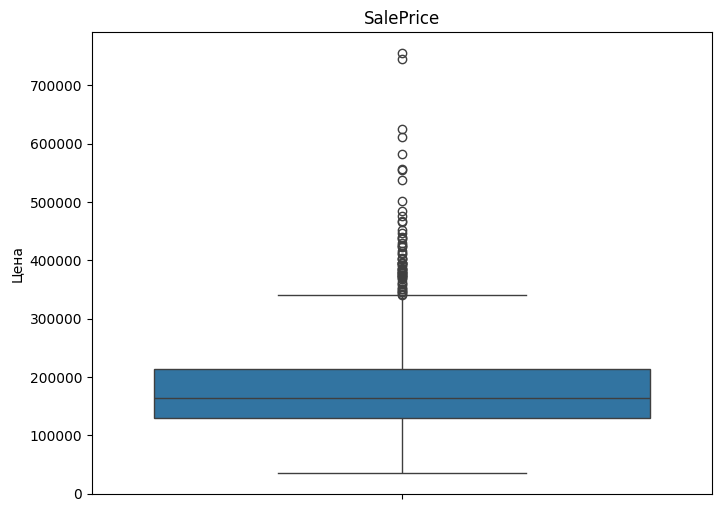

In [81]:
# Визуализация выбросов график "Ящик с усами"
plt.figure(figsize=(10, 10))
sns.boxplot(data=df, y='SalePrice')
plt.title('SalePrice')
plt.ylabel('Цена')
plt.show()

Выбросы обнаружены однако их обработка согласно заданию не требуется.

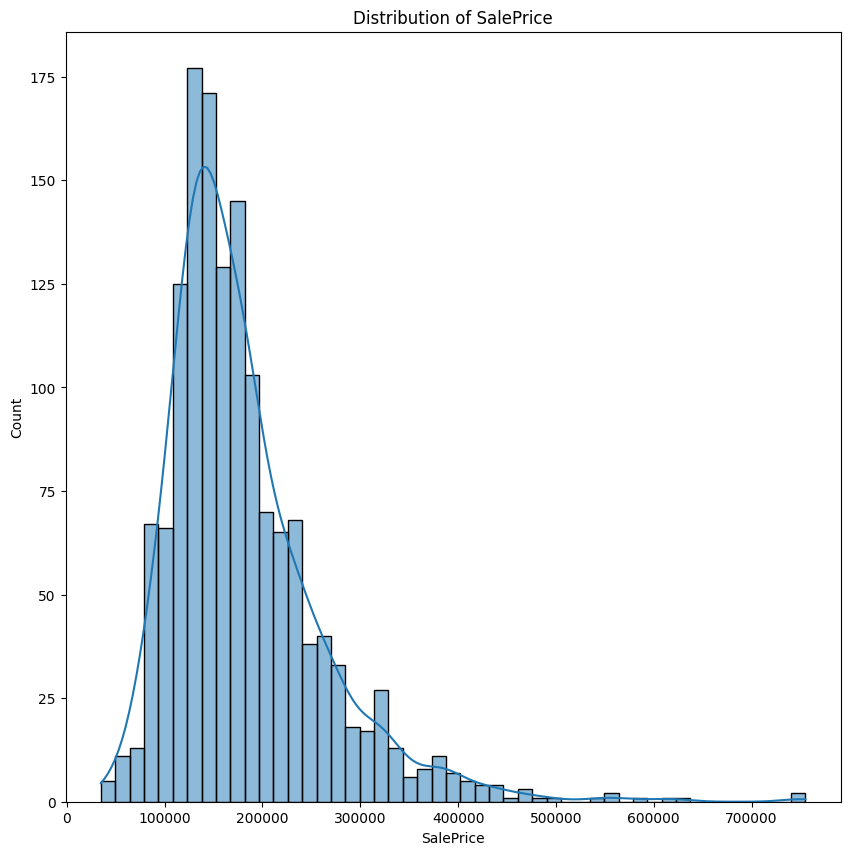

In [74]:
# Делаем визуальное распределение целевой переменной 'SalePrice'
plt.figure(figsize=(10, 10))
sns.histplot(df["SalePrice"], kde=True)
plt.xlabel("SalePrice")
plt.ylabel("Count")
plt.title("Distribution of SalePrice")
plt.show()

5. Выполните проектирование признаков путем реализации следующих преобразований: 
- a. Работайте с категориальными переменными, применяя one-hot encoding или label encoding, в зависимости от характера переменной. 
- b. При необходимости создайте новые характеристики, такие как общая площадь или возраст объекта недвижимости, путем объединения существующих характеристик.

6. Сохраните очищенный и преобразованный набор данных в новый CSV-файл под названием 'cleaned_house_prices.csv'.